#Описание датасета:
 Задача заключается в прогнозировании стоимости ноутбука на основе его технических характеристик, таких как бренд процессора, объем оперативной памяти, размер дисплея и других параметров. Это задача регрессии, где целевая переменная — цена ноутбука (Price), и мы пытаемся найти зависимость цены от остальных характеристик, чтобы спрогнозировать цену для новых ноутбуков.


In [93]:
import pandas as pd
import numpy as np


data = pd.read_csv('laptop.csv')
data

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,4403,ASUS,ASUS Zenbook UX430UN-GV022T Laptop (14 Inch | ...,84990,Intel Core i5 (8th Gen),Intel,32 GB Expandable,8 GB,DDR4 RAM,1.6 Ghz Processor,LED,14,"Geforce MX150 GPU, 2 GB",NVIDIA,512 GB SSD Storage,No HDD,65,Upto 9 Hrs Battery Life
3972,4404,ASUS,ASUS Vivobook K15 OLED K513EA-L301WS Laptop (1...,40031,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LED,15.6,UHD,Intel,256 GB SSD Storage,No HDD,65,Upto 3 Hrs Battery Life
3973,4405,ASUS,ASUS VivoBook Pro 15 OLED M3500QC-L1711WS Lapt...,75990,AMD Octa-Core Ryzen 7,AMD,Not Expandable,16 GB,DDR4 RAM,3.1 Ghz Processor,LED,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,1024 GB SSD Storage,No HDD,120,Upto 3 Hrs Battery Life
3974,4407,ASUS,ASUS TUF FX505DT-AL118T Laptop (15.6 Inch | AM...,71909,AMD Quad-Core Ryzen 5,AMD,32 GB Expandable,8 GB,DDR4 RAM,2.1 Ghz Processor,LED,15.6,"GeForce GTX 1650 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,150,150W Adapter


# Убираем ненужные характеристики

In [94]:
columns_for_remove = ["RAM_TYPE", "Display_type", "Adapter", "Processor_Name", "GPU", "Name", "Battery_Life", "Brand"]
data = data.drop(data.columns[0], axis=1)
data = data.drop(columns=columns_for_remove)
#удаляем пустые строчки
data = data.replace("nan", np.nan).replace("NaN", np.nan)
data = data.dropna(how='any')

# Рассчёт квантиля

In [103]:
data['Price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Price
0.005,14999.00
0.010,17990.96
0.050,24788.00
0.100,29743.80
0.500,58990.00
0.900,129711.40
0.950,169990.00
0.990,281990.00
0.995,341890.00


Можем увидеть, что 90% всех ноутбуков находятся в ценовом сегменте от 24788 до 169990.

Удалим строки, в которых Price выходит за пределы квантилей 0.05 и 0.95

In [ ]:
rows_to_drop = data[(data['Price'] < data['Price'].quantile(0.05)) | (data['Price'] > data['Price'].quantile(0.95))].index
data = data.drop(rows_to_drop)

data

# Преобразование данных
Приводим необходимые данные к численному виду, а так же заменим в столбцах с двумя значениями на 0 и 1.

In [95]:
# Оставляем только строки, где Processor_Brand равен Intel или AMD
data = data[data['Processor_Brand'].isin(['Intel', 'AMD'])]

data.replace({
    'HDD': {'No HDD': 0, '1 GB HDD Storage': 0},
    'GPU_Brand': {'NIVIDIA': 'Nvidia', 'NVIDIA': 'Nvidia'},
    'RAM_Expandable': {'Not Expandable': 0}
}, inplace=True)

data = pd.get_dummies(data, columns=[ 'Processor_Brand', 'GPU_Brand'])
data = data.replace({False: 0, True: 1})
mask = data['HDD'].str.contains(' GB HDD Storage', na=False)  # маска строк, содержащих ' GB HDD Storage'

# Заменяем и извлекаем числа только для отфильтрованных строк
data.loc[mask, 'HDD'] = data.loc[mask, 'HDD'].str.replace(' GB HDD Storage', '', regex=False).str.extract('(\d+)')[0]
data['HDD'] = pd.to_numeric(data['HDD'], errors='coerce').astype('Int64')
data['Display'] = pd.to_numeric(data['Display'], errors='coerce').astype('float64')

data['RAM'] = data['RAM'].str.extract(r'(\d+)')[0]
data['RAM'] = pd.to_numeric(data['RAM'], errors='coerce').fillna(0).astype(int)

data['Ghz'] = data['Ghz'].str.replace('Ghz Processor', '', regex=False).str.extract(r'(\d+\.\d+|\d+)')[0]
data['Ghz'] = data['Ghz'].astype(float)

data['SSD'] = data['SSD'].str.extract(r'(\d+)')[0]
data['SSD'] = pd.to_numeric(data['SSD'], errors='coerce').fillna(0).astype(int)

data['RAM_Expandable'] = data['RAM_Expandable'].str.extract(r'(\d+)')[0]
data['RAM_Expandable'] = pd.to_numeric(data['RAM_Expandable'], errors='coerce').fillna(0).astype(int)

data = data.replace("nan", np.nan).replace("NaN", np.nan)
data = data.dropna(how='any')

<ipython-input-95-787d75012e9f>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({False: 0, True: 1})


,Price,RAM_Expandable,RAM,Ghz,Display,SSD,HDD,Processor_Brand_AMD,Processor_Brand_Intel,GPU_Brand_AMD,GPU_Brand_ATI,GPU_Brand_Intel,GPU_Brand_Nvidia
1,36289,12,8,4.0,15.6,512,0,1,0,1,0,0,0
2,78500,32,16,3.3,15.6,512,0,0,1,0,0,0,1
3,55490,8,8,4.2,15.6,512,0,0,1,0,0,1,0
4,21990,0,8,1.7,15.6,512,0,0,1,0,0,1,0
5,34990,32,16,0.0,14.0,512,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,84990,32,8,1.6,14.0,512,0,0,1,0,0,0,1
3972,40031,0,8,4.0,15.6,256,0,0,1,0,0,1,0
3973,75990,0,16,3.1,15.6,1024,0,1,0,0,0,0,1
3974,71909,32,8,2.1,15.6,512,0,1,0,0,0,0,1


# Получаем статистику по датасету

In [105]:
data.describe()

,Price,RAM_Expandable,RAM,Ghz,Display,SSD,HDD,Processor_Brand_AMD,Processor_Brand_Intel,GPU_Brand_AMD,GPU_Brand_ATI,GPU_Brand_Intel,GPU_Brand_Nvidia
count,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.0,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000,3925.000000
mean,71885.222166,10.929427,11.152102,2.627439,15.076790,463.148790,246.414268,0.234140,0.765860,0.156688,0.000255,0.491465,0.351592
std,51410.986155,15.693365,6.331164,1.253246,1.022125,347.090405,446.1022,0.423514,0.423514,0.363553,0.015962,0.499991,0.477528
min,7990.000000,0.000000,2.000000,0.000000,10.100000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39853.000000,0.000000,8.000000,1.800000,14.000000,256.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,58990.000000,0.000000,8.000000,2.400000,15.600000,512.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,84420.000000,16.000000,16.000000,3.400000,15.600000,512.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,503890.000000,64.000000,64.000000,5.500000,18.000000,4098.000000,2048.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: xlabel='Price', ylabel='Price'>,
        <Axes: xlabel='RAM_Expandable', ylabel='Price'>,
        <Axes: xlabel='RAM', ylabel='Price'>,
        <Axes: xlabel='Ghz', ylabel='Price'>,
        <Axes: xlabel='Display', ylabel='Price'>,
        <Axes: xlabel='SSD', ylabel='Price'>,
        <Axes: xlabel='HDD', ylabel='Price'>,
        <Axes: xlabel='Processor_Brand_AMD', ylabel='Price'>,
        <Axes: xlabel='Processor_Brand_Intel', ylabel='Price'>,
        <Axes: xlabel='GPU_Brand_AMD', ylabel='Price'>,
        <Axes: xlabel='GPU_Brand_ATI', ylabel='Price'>,
        <Axes: xlabel='GPU_Brand_Intel', ylabel='Price'>,
        <Axes: xlabel='GPU_Brand_Nvidia', ylabel='Price'>],
       [<Axes: xlabel='Price', ylabel='RAM_Expandable'>,
        <Axes: xlabel='RAM_Expandable', ylabel='RAM_Expandable'>,
        <Axes: xlabel='RAM', ylabel='RAM_Expandable'>,
        <Axes: xlabel='Ghz', ylabel='RAM_Expandable'>,
        <Axes: xlabel='Display', ylabel='RAM_Expandable'>,
        <Axes

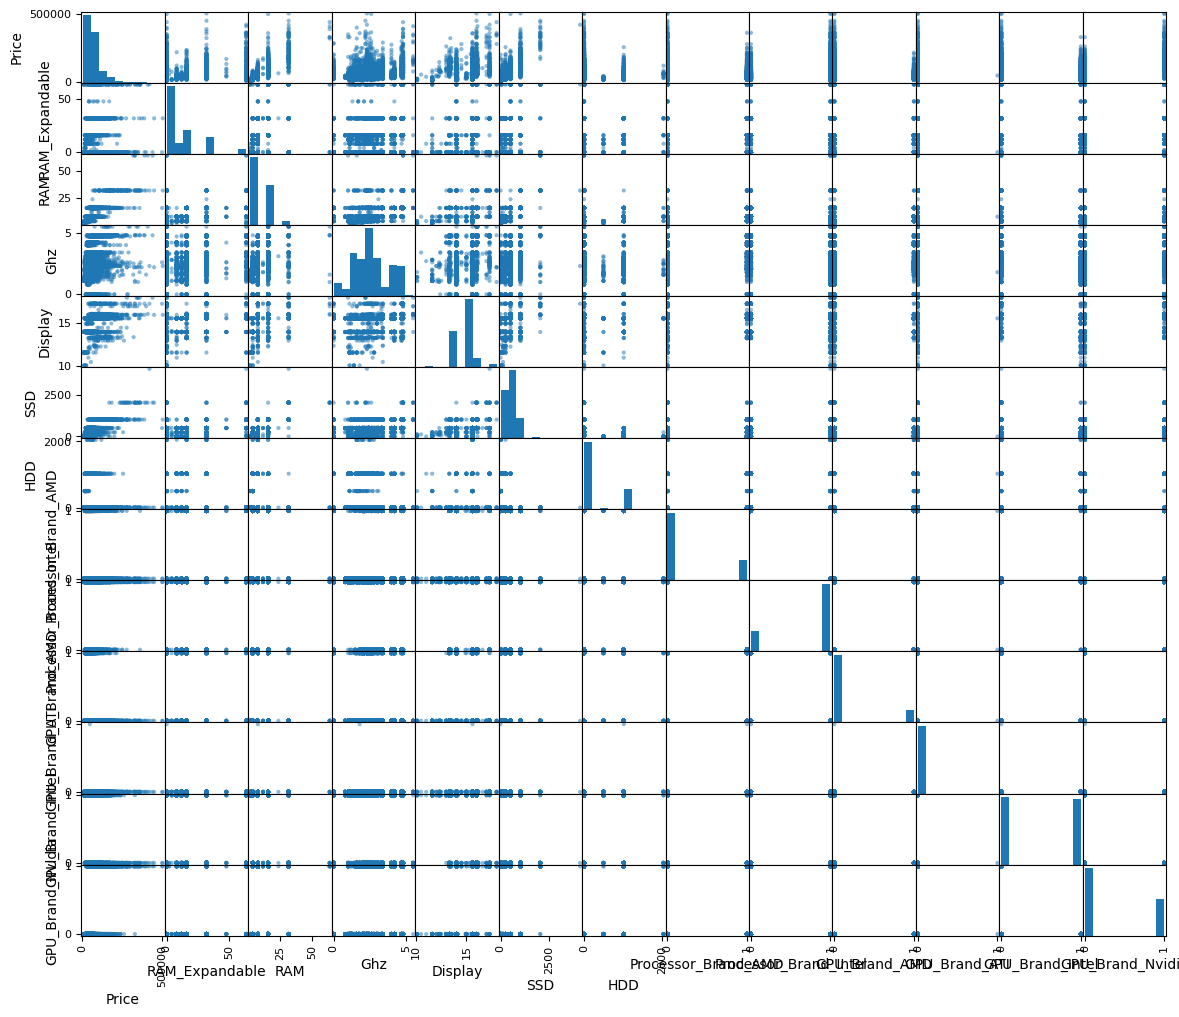

In [110]:
pd.plotting.scatter_matrix(data, figsize = (14, 12))

# Считаем средние значения и разброс

In [96]:
mean_values = data.mean()
print("Средние значения:\n", mean_values)

variance_values = data.var()
print("\nРазброс (дисперсия):\n", variance_values)

Средние значения:
 Price                    71885.222166
RAM_Expandable              10.929427
RAM                         11.152102
Ghz                          2.627439
Display                      15.07679
SSD                         463.14879
HDD                        246.414268
Processor_Brand_AMD           0.23414
Processor_Brand_Intel         0.76586
GPU_Brand_AMD                0.156688
GPU_Brand_ATI                0.000255
GPU_Brand_Intel              0.491465
GPU_Brand_Nvidia             0.351592
dtype: Float64

Разброс (дисперсия):
 Price                    2643089497.439424
RAM_Expandable                  246.281715
RAM                              40.083638
Ghz                               1.570626
Display                           1.044739
SSD                          120471.749518
HDD                          199007.172885
Processor_Brand_AMD               0.179364
Processor_Brand_Intel             0.179364
GPU_Brand_AMD                      0.13217
GPU_Brand_ATI      

# Проводим нормализацию

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

df_normalized

,Price,RAM_Expandable,RAM,Ghz,Display,SSD,HDD,Processor_Brand_AMD,Processor_Brand_Intel,GPU_Brand_AMD,GPU_Brand_ATI,GPU_Brand_Intel,GPU_Brand_Nvidia
0,0.057066,0.1875,0.096774,0.727273,0.696203,0.124939,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.142186,0.5000,0.225806,0.600000,0.696203,0.124939,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.095785,0.1250,0.096774,0.763636,0.696203,0.124939,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.028231,0.0000,0.096774,0.309091,0.696203,0.124939,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.054446,0.5000,0.225806,0.000000,0.493671,0.124939,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,0.155273,0.5000,0.096774,0.290909,0.493671,0.124939,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3921,0.064612,0.0000,0.096774,0.727273,0.696203,0.062469,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3922,0.137124,0.0000,0.225806,0.563636,0.696203,0.249878,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3923,0.128895,0.5000,0.096774,0.381818,0.696203,0.124939,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Строим корреляционную матрицу

In [98]:
correlation_matrix = data.corr()
correlation_matrix

,Price,RAM_Expandable,RAM,Ghz,Display,SSD,HDD,Processor_Brand_AMD,Processor_Brand_Intel,GPU_Brand_AMD,GPU_Brand_ATI,GPU_Brand_Intel,GPU_Brand_Nvidia
Price,1.000000,0.259507,0.754808,0.254452,0.173393,0.693564,-0.241643,-0.076048,0.076048,-0.193550,-0.007141,-0.274029,0.434512
RAM_Expandable,0.259507,1.000000,0.227920,0.123807,0.233465,0.219643,-0.058150,0.013415,-0.013415,-0.092086,-0.011119,-0.241666,0.323513
RAM,0.754808,0.227920,1.000000,0.302782,0.181866,0.716067,-0.359150,-0.012620,0.012620,-0.130929,-0.007949,-0.228346,0.339032
Ghz,0.254452,0.123807,0.302782,1.000000,0.135787,0.325174,-0.224723,0.132222,-0.132222,0.002195,-0.010541,-0.171314,0.178054
Display,0.173393,0.233465,0.181866,0.135787,1.000000,0.144561,0.138448,0.105985,-0.105985,-0.010373,0.008173,-0.382287,0.407894
SSD,0.693564,0.219643,0.716067,0.325174,0.144561,1.000000,-0.621024,0.047931,-0.047931,-0.116595,-0.021304,-0.187316,0.285606
HDD,-0.241643,-0.058150,-0.359150,-0.224723,0.138448,-0.621024,1.000000,-0.054233,0.054233,0.070583,0.027829,-0.060278,0.008446
Processor_Brand_AMD,-0.076048,0.013415,-0.012620,0.132222,0.105985,0.047931,-0.054233,1.000000,-1.000000,0.706753,0.028872,-0.536341,0.022539
Processor_Brand_Intel,0.076048,-0.013415,0.012620,-0.132222,-0.105985,-0.047931,0.054233,-1.000000,1.000000,-0.706753,-0.028872,0.536341,-0.022539
GPU_Brand_AMD,-0.193550,-0.092086,-0.130929,0.002195,-0.010373,-0.116595,0.070583,0.706753,-0.706753,1.000000,-0.006881,-0.423750,-0.317409


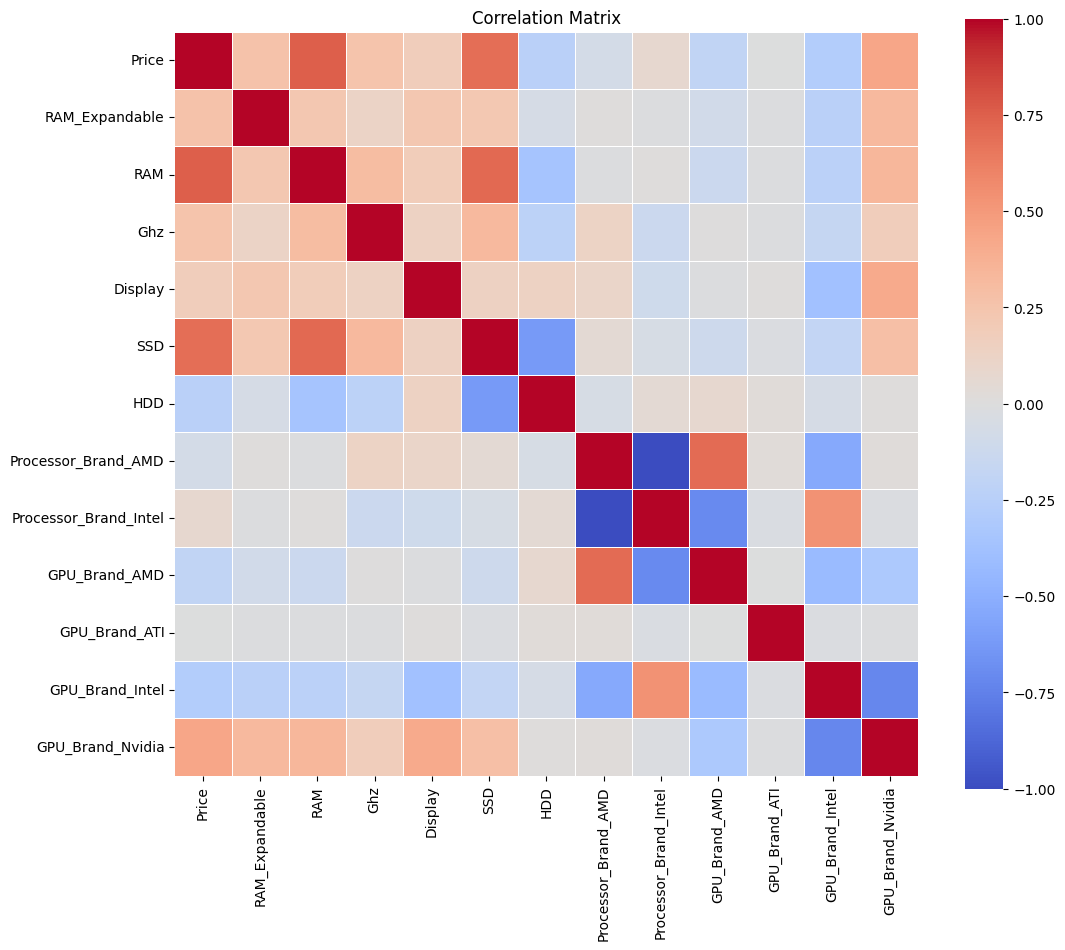

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, square=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Обучающая и тестовые выборки

In [100]:
from sklearn.model_selection import train_test_split

# Определяем целевой столбец и признаки
x = df_normalized.drop(columns=['Price'])  # Признаки (все столбцы, кроме 'Price')
y = df_normalized['Price']  # Целевая переменная

# Разделяем данные на обучающую и тестовую выборки (70% для обучения, 30% для тестирования)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Проверяем размеры выборок
print("Размер обучающей выборки:", x_train.shape, y_train.shape)
print("Размер тестовой выборки:", x_test.shape, y_test.shape)

Размер обучающей выборки: (2747, 12) (2747,)
Размер тестовой выборки: (1178, 12) (1178,)


In [101]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Инициализируем модель k-ближайших соседей для регрессии
knn = KNeighborsRegressor(n_neighbors=5)  # n_neighbors - количество соседей (обычно 3-5)

# Обучаем модель на обучающей выборке
knn.fit(x_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = knn.predict(x_test)

# Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.003651936202572885
R^2 Score: 0.6704168766560854


# Вывод
В результате работы с моделью k-ближайших соседей для предсказания цены ноутбуков мы получили такие показатели:

Точность модели:

Среднеквадратичная ошибка (MSE) получилась примерно 0.0037, что указывает на небольшую разницу между предсказанными и реальными ценами, хотя конкретную значимость этого показателя можно оценить только зная диапазон цен в данных.
Коэффициент детерминации (R²) составил 0.67, то есть модель объясняет около 67% вариаций в ценах ноутбуков. Это говорит о том, что модель предсказывает цены неплохо, но не идеально – есть еще пространство для улучшения.
Настройки модели:

Модель использовала 5 ближайших соседей для каждого предсказания. Это стандартное значение, но его стоит оптимизировать, пробуя разные значения и выбирая лучшее по качеству предсказаний.
Как улучшить результаты:

Попробовать разные значения для количества соседей, чтобы понять, с каким из них модель работает лучше.
Рассмотреть использование других моделей, таких как случайный лес или градиентный бустинг, которые могут дать лучший результат при наличии сложных взаимосвязей в данных.